In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

#for visualization purposes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
dataset = pd.read_csv('vaihingen_train_without_ground.csv')

In [3]:
dataset

X           Y       Z  Intensity  return_number  \
0       496848.91  5419403.58  265.46         19              1   
1       496848.92  5419403.97  265.43         24              1   
2       496848.93  5419404.35  265.40         31              1   
3       496848.94  5419404.73  265.36         33              1   
4       496849.34  5419405.72  265.30         44              1   
...           ...         ...     ...        ...            ...   
506842  497067.61  5419442.02  260.30        255              1   
506843  497067.62  5419442.47  260.28        243              1   
506844  497067.64  5419442.89  260.03        237              1   
506845  497067.65  5419443.29  259.84        113              1   
506846  497067.67  5419443.76  259.88        123              1   

        number_of_returns  label  
0                       1      1  
1                       1      1  
2                       1      1  
3                       1      1  
4                       1      1  
...                   ...    ...  
506842                  1      6  
506843                  1      7  
506844                  1      7  
506845                  1      7  
506846                  1      7  

[506847 rows x 7 columns]

In [4]:
dataset.label.unique()

array([1, 8, 7, 2, 5, 6, 3, 4, 0], dtype=int64)

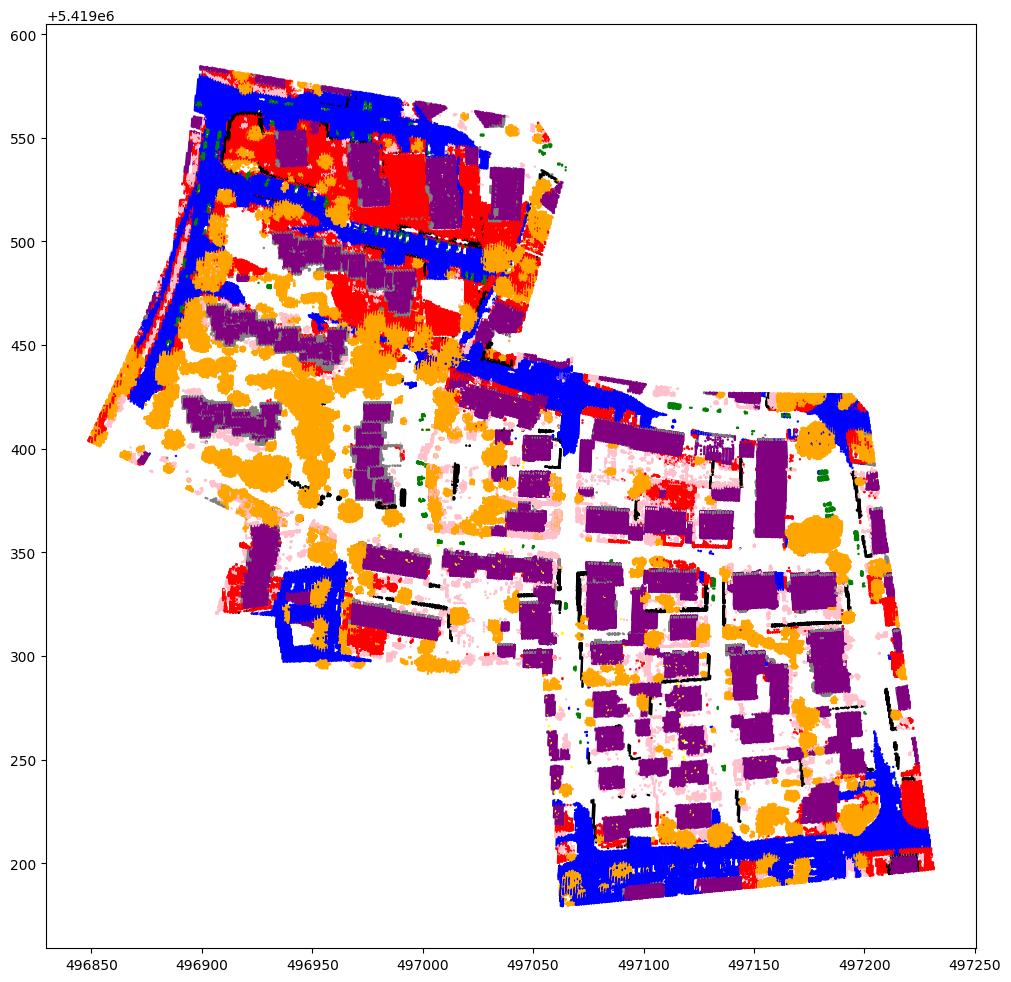

In [5]:
colors = {0:'yellow',1:'red',2:'blue',3:'green',4:'black',5:'purple',6:'gray',7:'pink',8:'orange'}
plt.figure(figsize=(12,12))
plt.scatter(dataset['X'],dataset['Y'],c=dataset['label'].map(colors),s=0.5)
plt.show()

CPU times: total: 11.2 s
Wall time: 11.5 s


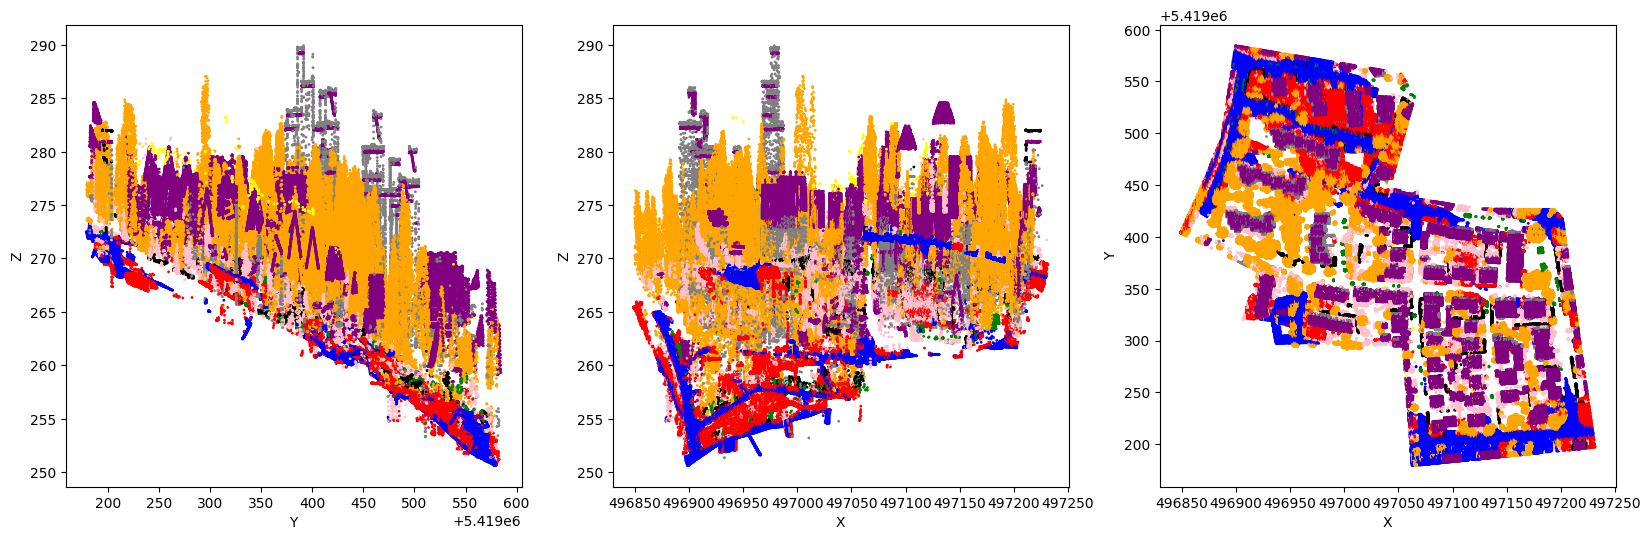

In [6]:
%%time
fig, m_axs = plt.subplots(1, 3, figsize = (20, 6))
ax_names = 'XYZ'
for i, c_ax in enumerate(m_axs.flatten()):
    plot_axes = [x for j, x in enumerate(ax_names) if j!=i]
    c_ax.scatter(dataset[plot_axes[0]],
                dataset[plot_axes[1]],
                c=dataset['label'].map(colors),
                 s=1
                )
    c_ax.set_xlabel(plot_axes[0])
    c_ax.set_ylabel(plot_axes[1])

In [7]:
label_names = {0: 'powerline',
               1: 'low-vegetation',
               2: 'Impervious Surface',
               3: 'car',
              4: 'Fence',
              5:'roof',
              6:'facade',
              7:'shrub',
              8:'tree'}

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


CPU times: total: 2.06 s
Wall time: 2.11 s


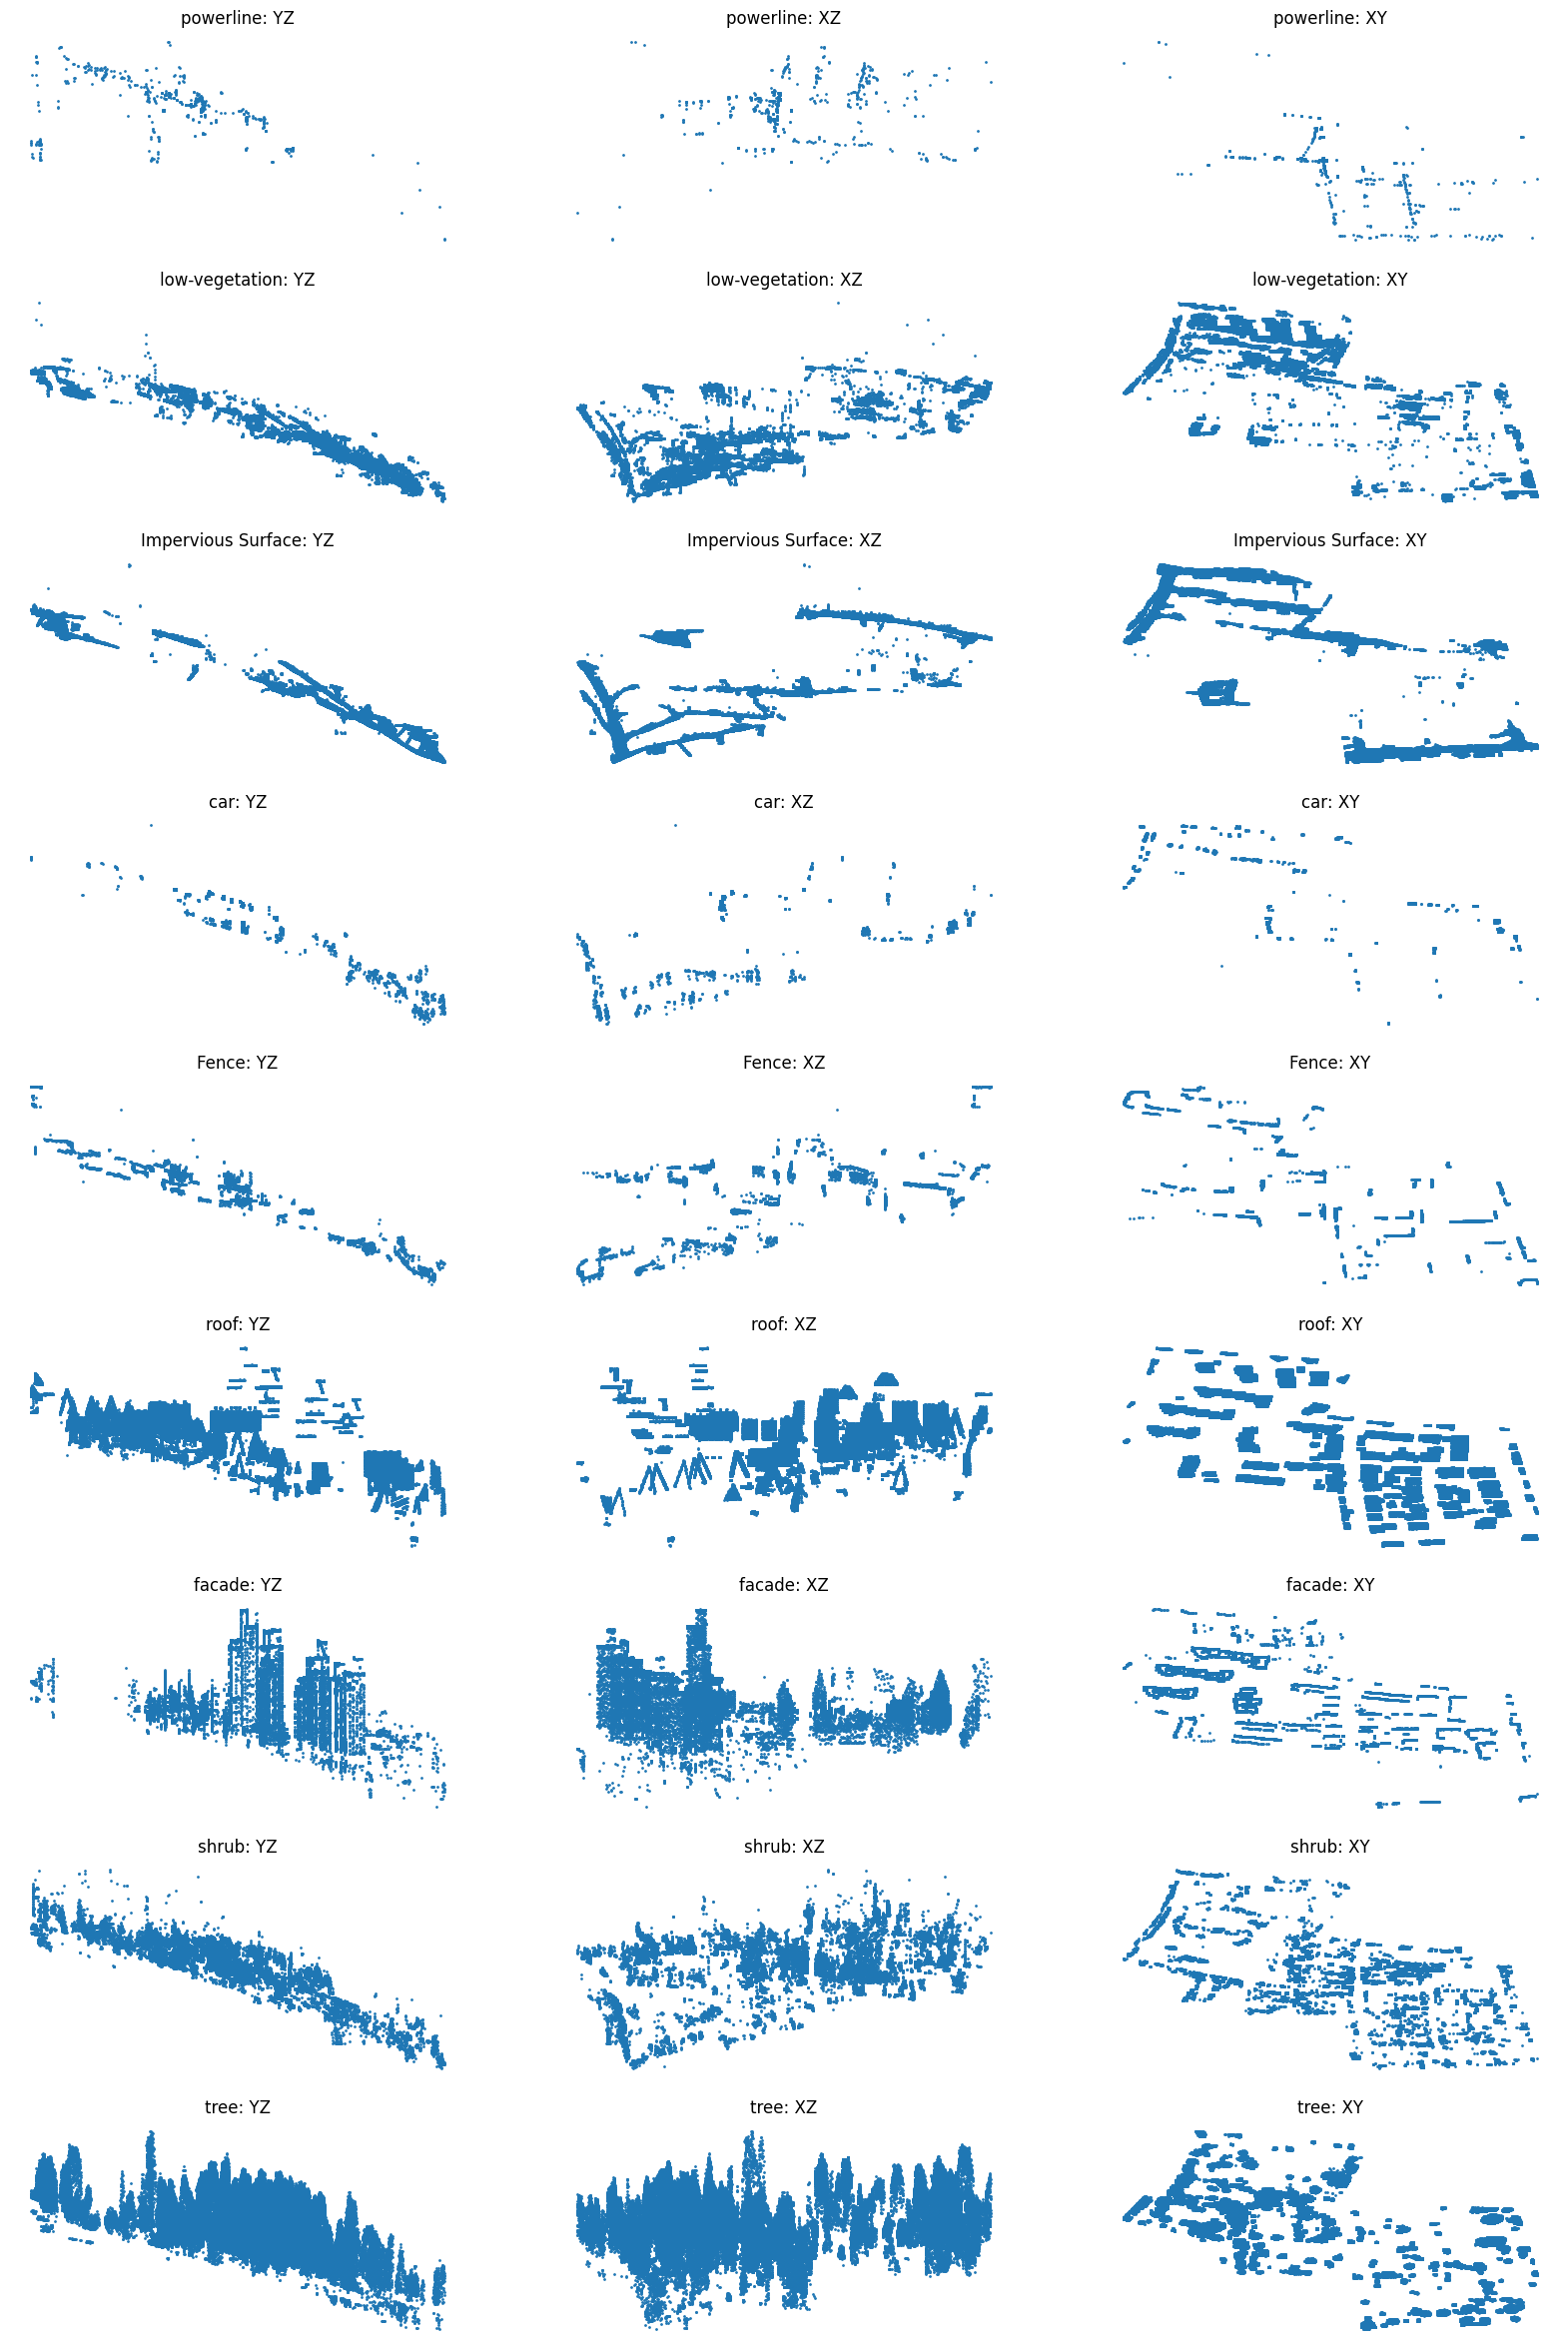

In [8]:
%%time
# fig, m_axs = plt.subplots(1, 3, figsize = (20, 5))
ax_names = 'XYZ'

max_keys = max(label_names.keys())
fig, m_axs = plt.subplots(max_keys + 1, 3, figsize = (20, 30))
for i, c_axs in enumerate(m_axs.T):
    plot_axes = [x for j, x in enumerate(ax_names) if j != i]
    for c_ax, (c_key, c_value) in zip(c_axs, label_names.items()):
        c_df = dataset[dataset['label'] == c_key]
        # print(c_df)
        c_ax.scatter(c_df[plot_axes[0]].values,
                  c_df[plot_axes[1]].values,
                  # '.',
                  label = c_value,
                  s=1
                 )
        c_ax.set_title('{}: {}'.format(c_value, ''.join(plot_axes)))
        c_ax.set_xlabel(plot_axes[0])
        c_ax.set_ylabel(plot_axes[1])
        c_ax.axis('off')

In [9]:
#Create training and testing
labels = dataset['label']
features = dataset[['X','Y','Z','Intensity']]
features_scaled = MinMaxScaler().fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4)


In [10]:
#this will take a lot of time
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False))),
  ('classification', RandomForestClassifier())
])
clf.fit(X_train, y_train)

C:\Users\HP\anaconda3\envs\pointc\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=0.01, dual=False,
                                                     penalty='l1'))),
                ('classification', RandomForestClassifier())])

In [11]:
# No, scaling is not necessary for random forests. The nature of RF is such that convergence and numerical precision issues, which can sometimes trip up the algorithms used in logistic and linear regression, as well as neural networks, aren't so important
rf_classifier = RandomForestClassifier(n_estimators = 10)

#The line below is useful only if you want to create a classification model
rf_classifier.fit(X_train, y_train)

#The line below is useful only if you want to test on an unseen dataset (real scenario)
rf_predictions = rf_classifier.predict(X_test)

print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.79      0.59      0.68       256
           1       0.93      0.94      0.93     18598
           2       0.97      0.98      0.97     36423
           3       0.92      0.86      0.89       933
           4       0.92      0.89      0.91      3037
           5       0.98      0.99      0.99     65348
           6       0.93      0.88      0.90      9848
           7       0.84      0.83      0.84     12147
           8       0.97      0.97      0.97     56149

    accuracy                           0.96    202739
   macro avg       0.92      0.88      0.90    202739
weighted avg       0.96      0.96      0.96    202739



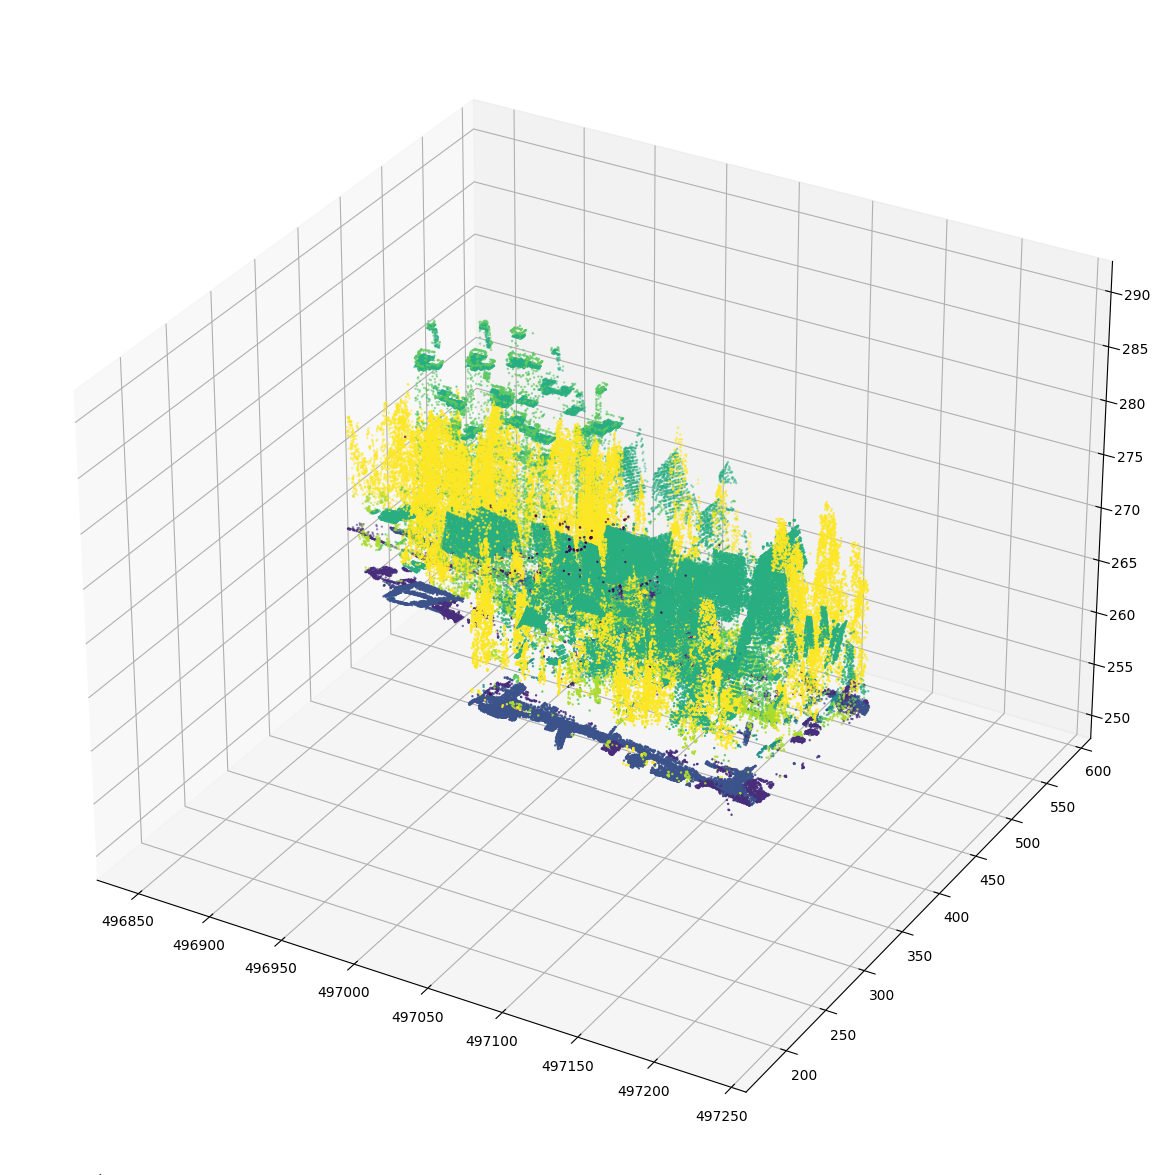

In [12]:
# plotting the results 3D
plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter(X_test['X'], X_test['Y'], X_test['Z'], c = rf_predictions, s=0.5)
plt.show()

C:\Users\HP\anaconda3\envs\pointc\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Differences')

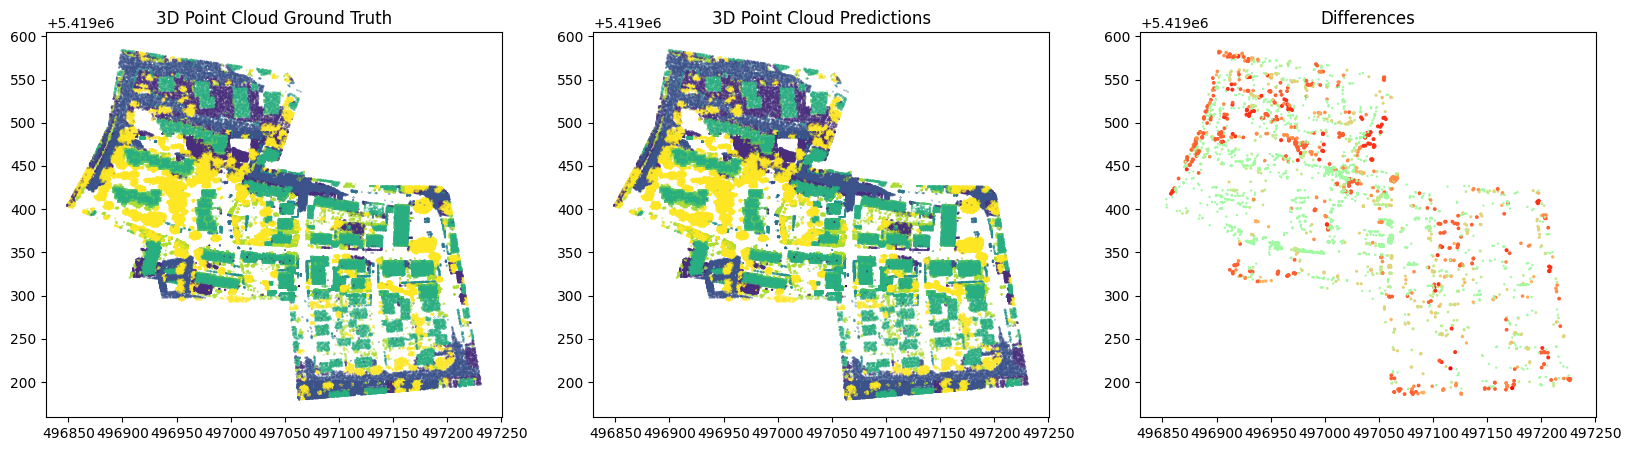

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].scatter(X_test['X'], X_test['Y'], c =y_test, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(X_test['X'], X_test['Y'], c = rf_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(X_test['X'], X_test['Y'], c = y_test-rf_predictions, cmap = plt.cm.rainbow, s=0.5*(y_test-rf_predictions))
axs[2].set_title('Differences')

                    precision    recall  f1-score   support

         powerline       0.64      0.29      0.40       256
    low-vegetation       0.85      0.87      0.86     18598
impervious surface       0.94      0.97      0.95     36423
               car       0.73      0.55      0.63       933
             fence       0.76      0.71      0.74      3037
              roof       0.94      0.98      0.96     65348
            facade       0.85      0.68      0.76      9848
             shrub       0.74      0.63      0.68     12147
              tree       0.95      0.95      0.95     56149

          accuracy                           0.92    202739
         macro avg       0.82      0.74      0.77    202739
      weighted avg       0.91      0.92      0.92    202739



C:\Users\HP\anaconda3\envs\pointc\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Differences')

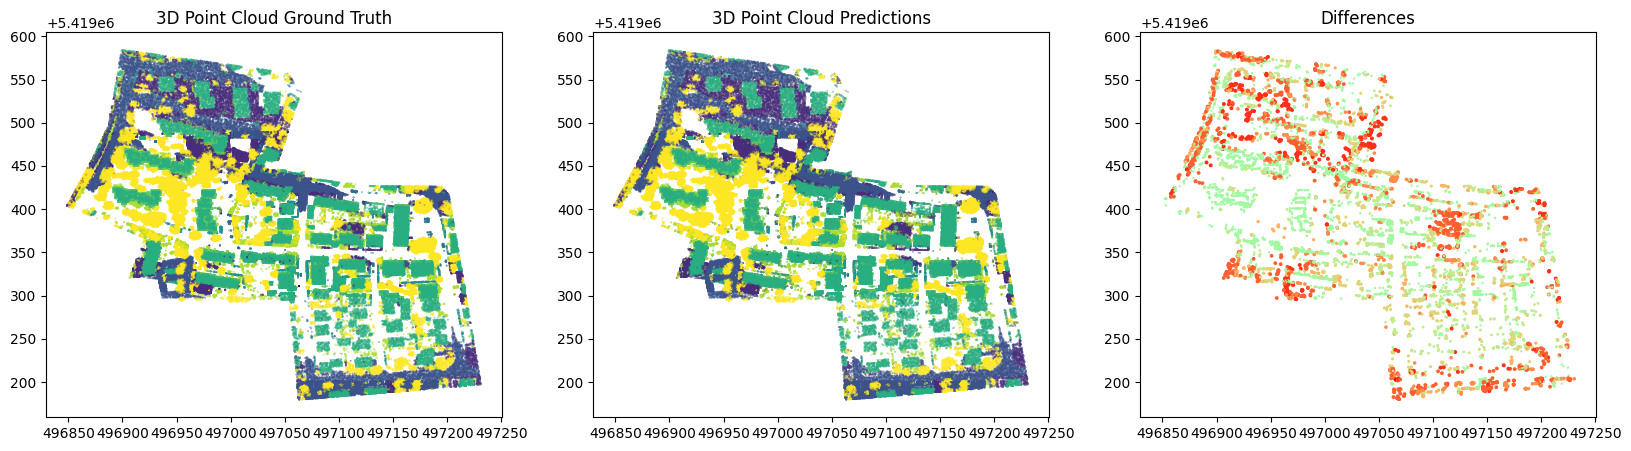

In [14]:
#Example of a K-Nearest Neighbors Model for 3D Point Cloud Semantic Segmentation
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
print(classification_report(y_test, knn_predictions, target_names=['powerline','low-vegetation','impervious surface','car','fence','roof','facade','shrub','tree']))

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].scatter(X_test['X'], X_test['Y'], c =y_test, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(X_test['X'], X_test['Y'], c = knn_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(X_test['X'], X_test['Y'], c = y_test-knn_predictions, cmap = plt.cm.rainbow, s=0.5*(y_test-knn_predictions))
axs[2].set_title('Differences')

C:\Users\HP\anaconda3\envs\pointc\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\anaconda3\envs\pointc\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\envs\pointc\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

                    precision    recall  f1-score   support

         powerline       0.00      0.00      0.00       256
    low-vegetation       0.09      1.00      0.17     18598
impervious surface       0.00      0.00      0.00     36423
               car       0.00      0.00      0.00       933
             fence       0.00      0.00      0.00      3037
              roof       0.00      0.00      0.00     65348
            facade       0.00      0.00      0.00      9848
             shrub       0.00      0.00      0.00     12147
              tree       0.00      0.00      0.00     56149

          accuracy                           0.09    202739
         macro avg       0.01      0.11      0.02    202739
      weighted avg       0.01      0.09      0.02    202739



C:\Users\HP\anaconda3\envs\pointc\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Differences')

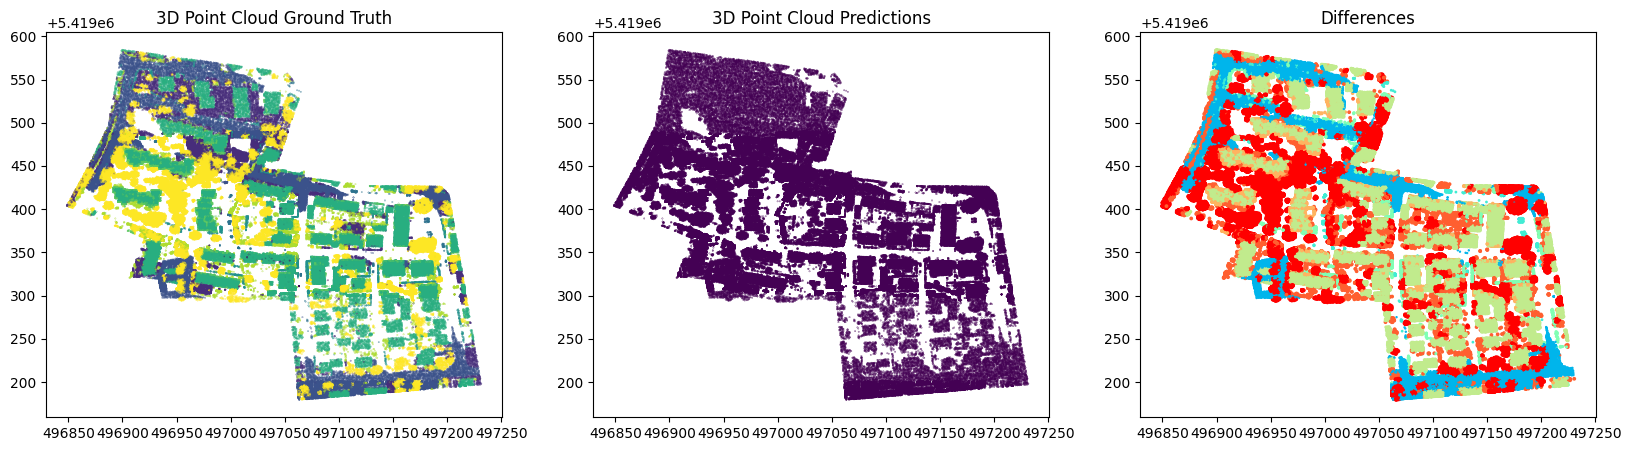

In [15]:
#Example of a Multi-Layer Perception Model for 3D Point Cloud Semantic Segmentation
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15, 2), random_state=1)
mlp_classifier.fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)
print(classification_report(y_test, mlp_predictions, target_names=['powerline','low-vegetation','impervious surface','car','fence','roof','facade','shrub','tree']))

fig, axs = plt.subplots(1, 3, figsize=(20,5)) # row 1, col 2 index 1
# fig, ax = plt.subplots(nrows=1, ncols=2)
axs[0].scatter(X_test['X'], X_test['Y'], c =y_test, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(X_test['X'], X_test['Y'], c = mlp_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(X_test['X'], X_test['Y'], c = y_test-mlp_predictions, cmap = plt.cm.rainbow, s=0.5*(y_test-mlp_predictions))
axs[2].set_title('Differences')